In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)

'''
Say we have a central body M1, and a secondary body M2 enters a circular area with radius R with a velocity of v.
When this body enters the area, it will encounter the gravitational force field exuded by the central body M1.
This force will pull the body M2 inward, but with a high enough v (assuming an inertial frame), the secondary body
should be able to maintain an elliptical orbit, instead of falling inward.
With too high of a v, though, the secondary body will continue on its course unimpeded, and will only be slightly
diverted in its trajectory.

How do we plot this?
We look at how the gravitational force will impact the vertical and horizontal direction of the seconary body.
In reality, we would have to account for 3 possible axes of movement, but for simplicity, we will focus on a 
2-dimensional simulation.



In [3]:
#Trying to use Classes and Objects
#G = 6.674 * 10 ** (-11) * (3600 * 24) ** 2 #m^3 kg^-1 day^-2
G = 6.674 * 10 ** (-11) * (3600 ** 2) #m^3 kg^-1 hr^-2
#G = 6.674 * 10 ** (-11) ##m^3 kg^-1 s^-2

def calc_distance(body1, body2):
    R = np.sqrt((body1.x_position - body2.x_position)**2 + (body1.y_position - body2.y_position)**2)
    return R
def update_velocity(velocity, acceleration, timestep):
    new_velocity = velocity + (acceleration * timestep)
    return new_velocity
def update_position(x, y, v_x, v_y, timestep):
    new_x = x + v_x*timestep
    new_y = y + v_y*timestep
    return new_x, new_y
def calculate_step(star, planet, t = 1):
    #t = timestep. Sets default timestep to 1 unit. Current time units are days.
    R = calc_distance(star, planet)
    a = -G * star.mass * np.abs(R ** (-3)) #Acceleration assuming the only force is gravity acting on the planet
    #Attempting to account for directionality by using positions of two bodies instead of guessing or using trig    
    v_x = planet.velocity * -(star.y_position - planet.y_position)/R
    v_y = planet.velocity * (star.x_position - planet.x_position)/R
    planet.x_position, planet.y_position = update_position(planet.x_position, planet.y_position, v_x, v_y, t)
    planet.velocity = update_velocity(planet.velocity, a, t)
    return planet.x_position, planet.y_position
    
class body:
    global G
    def __init__(self, name, mass, x_position, y_position, velocity):
        self.name = name
        self.mass = mass
        self.x_position = x_position
        self.y_position = y_position
        self.velocity = velocity
        





In [13]:
#Initial Conditions
M1 = 1.9091 * 10 ** 30 #kg #solar mass
M2 = 5.9724 * 10 ** 24 #kg #earth mass

v = (30.29 * 10**3)* 3600# * 24  #m/day
x = 147.09 * 10**9#m
y = 0 #m

Sun = body("Sun", M1, 0, 0, 0)
Earth = body("Earth", M2, x, y, v)

In [19]:


#Creating arrays to store the data points to be plotted
earth_y_pos = []
earth_x_pos = []
sun_y_pos = []
sun_x_pos = []
x_0 = Earth.x_position
y_0 = Earth.y_position

#Run Simulation
for t in range(8752):
    earth_x, earth_y = calculate_step(Sun, Earth)
    sun_x, sun_y = calculate_step(Earth, Sun)
    earth_y_pos.append(earth_y)
    earth_x_pos.append(earth_x)
    sun_y_pos.append(sun_y)
    sun_x_pos.append(sun_x)
    


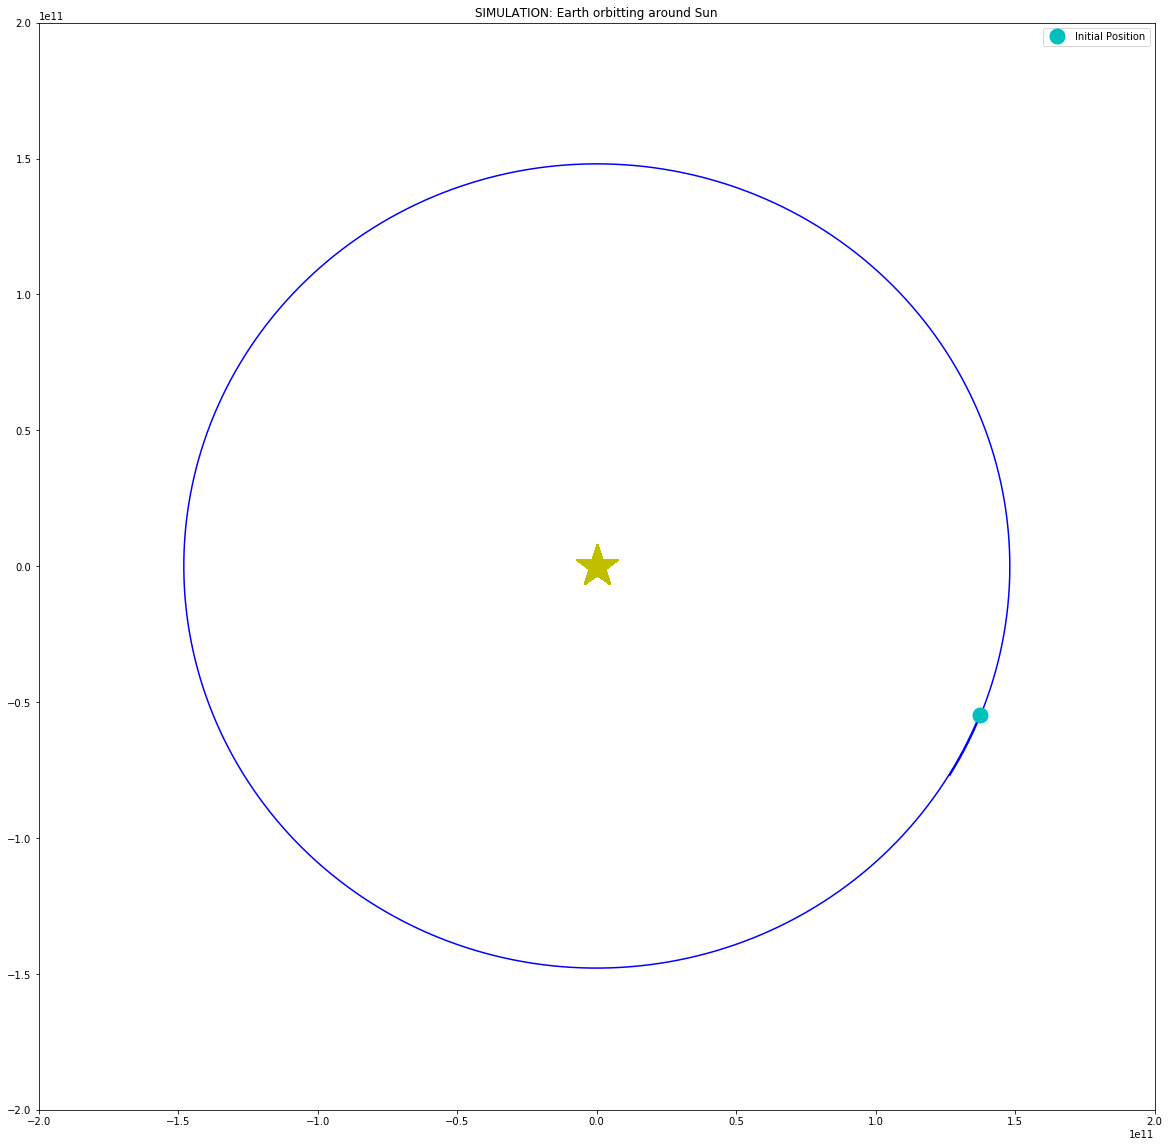

In [26]:

plt.plot(earth_x_pos, earth_y_pos, 'b-')
plt.plot(sun_x_pos, sun_y_pos, 'y*', markersize = 45)
plt.plot(x_0, y_0, 'co', markersize = 15, label = "Initial Position")
plt.xlim(-2 * 10 ** 11, 2 * 10**11)
plt.ylim(-2 * 10 ** 11, 2 * 10**11)
plt.title("SIMULATION: {:s}".format(Earth.name) + " orbitting around {:s}".format(Sun.name))
plt.legend()
plt.show()